# Chapter 10: Introduction to Deep Learning for Vision (PyTorch / TensorFlow)

## Objective
To introduce the fundamentals of deep learning in computer vision using Convolutional Neural Networks (CNNs) and pretrained models. Students will learn image classification workflows using PyTorch or TensorFlow and apply them to real-world images.


## 1. What is Deep Learning for Vision?

**Description**: Deep learning enables automated feature extraction from images using multi-layer neural networks, especially **Convolutional Neural Networks (CNNs)**, which are designed to handle spatial data like images.


## 2. Environment Setup

### 2.1 Required Libraries
Choose either **PyTorch** or **TensorFlow** as your preferred framework.


In [16]:
# Install required packages (run once if needed)
# pip install torch torchvision torchaudio matplotlib
# pip install tensorflow keras opencv-python

# Import libraries for both frameworks
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import os

print("Base libraries imported successfully!")
print("Choose either PyTorch or TensorFlow for the following sections.")


Base libraries imported successfully!
Choose either PyTorch or TensorFlow for the following sections.


## 3. CNN-Based Image Classification with PyTorch

### 3.1 Using Pretrained ResNet for Inference


In [17]:
import torch
import torchvision.transforms as transforms
from PIL import Image
from torchvision import models
import matplotlib.pyplot as plt

# Load pretrained model
model = models.resnet18(pretrained=True)
model.eval()

# Image preprocessing
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

img = Image.open('images/cat.jpeg')
img_tensor = transform(img).unsqueeze(0)

# Predict
with torch.no_grad():
    output = model(img_tensor)
    _, predicted = torch.max(output, 1)

print('Predicted class index:', predicted.item())

# Output Description: Classifies the input image using ResNet-18 and outputs the predicted class index.


Predicted class index: 282


## 4. CNN-Based Image Classification with TensorFlow/Keras

### 4.1 Using Pretrained MobileNetV2


In [18]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np

model = MobileNetV2(weights='imagenet')
img = image.load_img('images/cat.jpeg', target_size=(224, 224))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

# Output Description: Displays the top-3 predicted labels and probabilities using MobileNetV2.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 900ms/step
Predicted: [('n02124075', 'Egyptian_cat', np.float32(0.1570049)), ('n02123597', 'Siamese_cat', np.float32(0.07840525)), ('n02091244', 'Ibizan_hound', np.float32(0.03208647))]


## 5. Custom Image Input with OpenCV


In [19]:
import cv2

img = cv2.imread('images/cat.jpeg')
img = cv2.resize(img, (224, 224))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Continue with same preprocessing and prediction as above

# Output Description: Enables using OpenCV images as inputs for CNNs in both frameworks.


## 6. Visualizing CNN Predictions


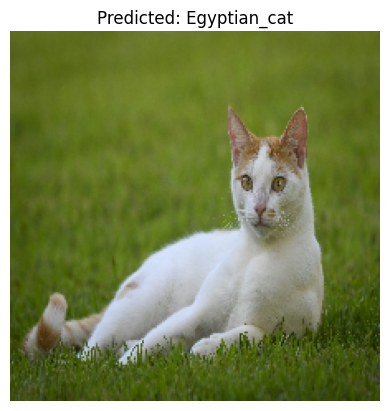

In [20]:
plt.imshow(img)
plt.title(f'Predicted: {decode_predictions(preds, top=1)[0][0][1]}')
plt.axis('off')
plt.show()

# Output Description: Displays the input image with the top predicted class label.


## 7. Summary

• **CNNs** automate feature extraction using layers of convolutions and activations.
• **Pretrained models** like ResNet and MobileNet reduce training time and improve accuracy.
• **PyTorch and TensorFlow** provide easy access to top-performing models.


---

# Suggested Exercises Implementation

## Exercise 1: Run predictions on your own image dataset


📊 CIFAR-10 Dataset Loaded:
   • Training images: 50000
   • Test images: 10000
   • Image size: 32x32 pixels
   • Classes: 10
\n🔍 Comparing CIFAR-10 predictions:
   Image 1: True=cat, Predicted=mink (21.8%)
   Image 2: True=automobile, Predicted=moving_van (87.8%)
   Image 3: True=frog, Predicted=gyromitra (10.4%)
   Image 4: True=airplane, Predicted=airliner (11.7%)
   Image 5: True=ship, Predicted=grey_whale (36.1%)
   Image 6: True=automobile, Predicted=beach_wagon (16.9%)
   Image 7: True=deer, Predicted=proboscis_monkey (16.7%)
   Image 8: True=bird, Predicted=jacamar (33.5%)


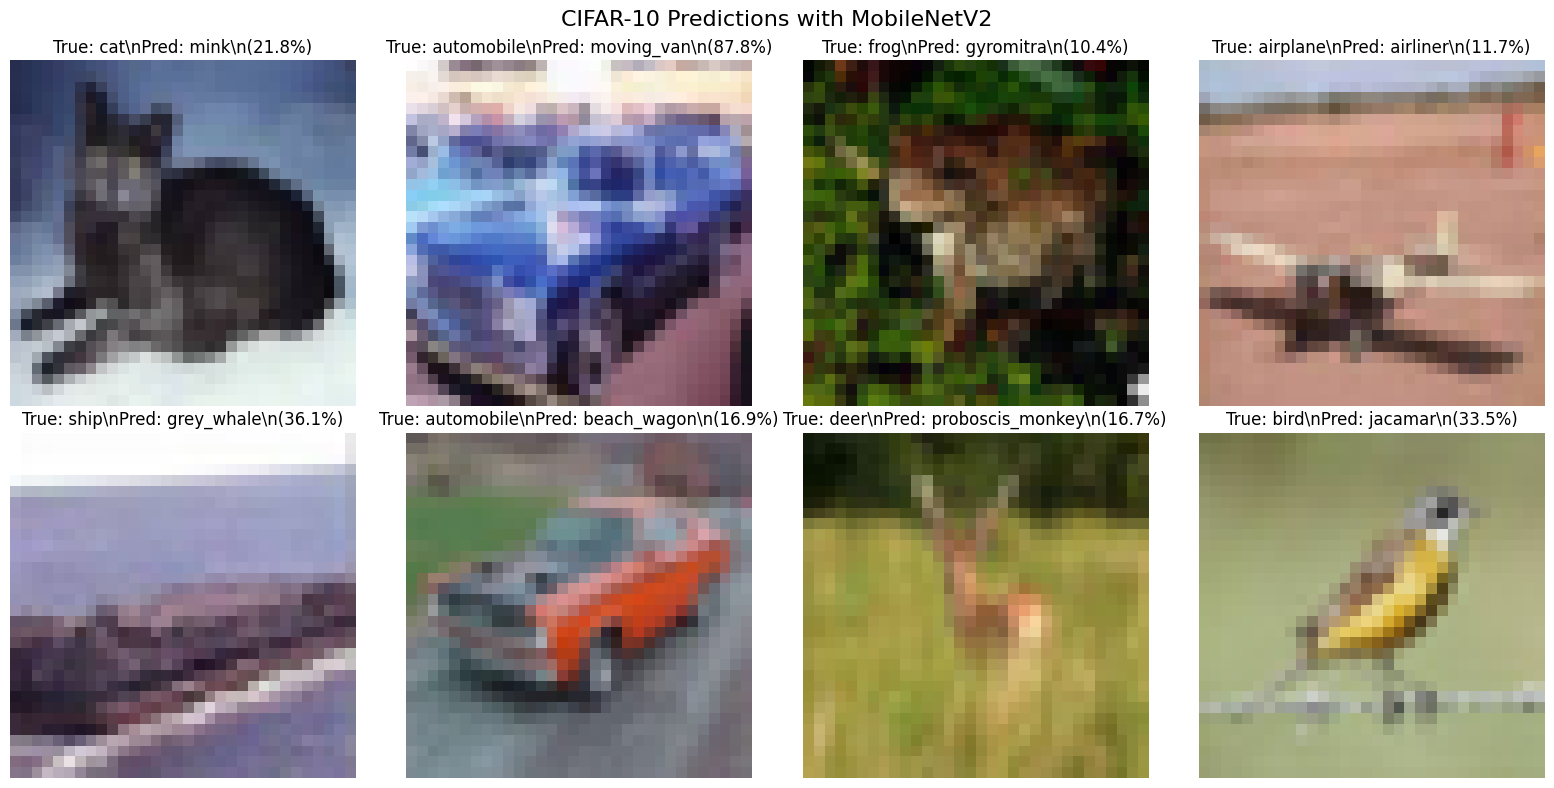

\n✅ Exercise 1 completed! CIFAR-10 dataset predictions done.


In [22]:
# Exercise 1: Load CIFAR-10 dataset and run predictions
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions

# Load MobileNetV2 model for this exercise
mobilenet_model = MobileNetV2(weights='imagenet')

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# CIFAR-10 class names
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
                   'dog', 'frog', 'horse', 'ship', 'truck']

print(f"📊 CIFAR-10 Dataset Loaded:")
print(f"   • Training images: {x_train.shape[0]}")
print(f"   • Test images: {x_test.shape[0]}")
print(f"   • Image size: {x_train.shape[1]}x{x_train.shape[2]} pixels")
print(f"   • Classes: {len(cifar10_classes)}")

# Select a few test images for prediction
num_samples = 8
sample_indices = np.random.choice(len(x_test), num_samples, replace=False)

# Create comparison figure
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

print("\\n🔍 Comparing CIFAR-10 predictions:")

for i, idx in enumerate(sample_indices):
    # Get sample image
    sample_img = x_test[idx]
    true_label = cifar10_classes[y_test[idx][0]]
    
    # Resize to 224x224 for MobileNetV2
    img_resized = tf.image.resize(sample_img, [224, 224])
    img_resized = tf.cast(img_resized, tf.uint8)
    
    # Preprocess for MobileNetV2
    x = tf.expand_dims(img_resized, 0)
    x = tf.cast(x, tf.float32)
    x = preprocess_input(x)
    
    # Predict with MobileNetV2
    preds = mobilenet_model.predict(x, verbose=0)
    top_pred = decode_predictions(preds, top=1)[0][0]
    
    # Display
    row, col = i // 4, i % 4
    axes[row, col].imshow(sample_img)
    axes[row, col].set_title(f'True: {true_label}\\nPred: {top_pred[1]}\\n({top_pred[2]:.1%})')
    axes[row, col].axis('off')
    
    print(f"   Image {i+1}: True={true_label}, Predicted={top_pred[1]} ({top_pred[2]:.1%})")

plt.suptitle('CIFAR-10 Predictions with MobileNetV2', fontsize=16)
plt.tight_layout()
plt.show()

print("\\n✅ Exercise 1 completed! CIFAR-10 dataset predictions done.")


## Exercise 2: Compare predictions from ResNet and MobileNet


102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 102s 1us/step


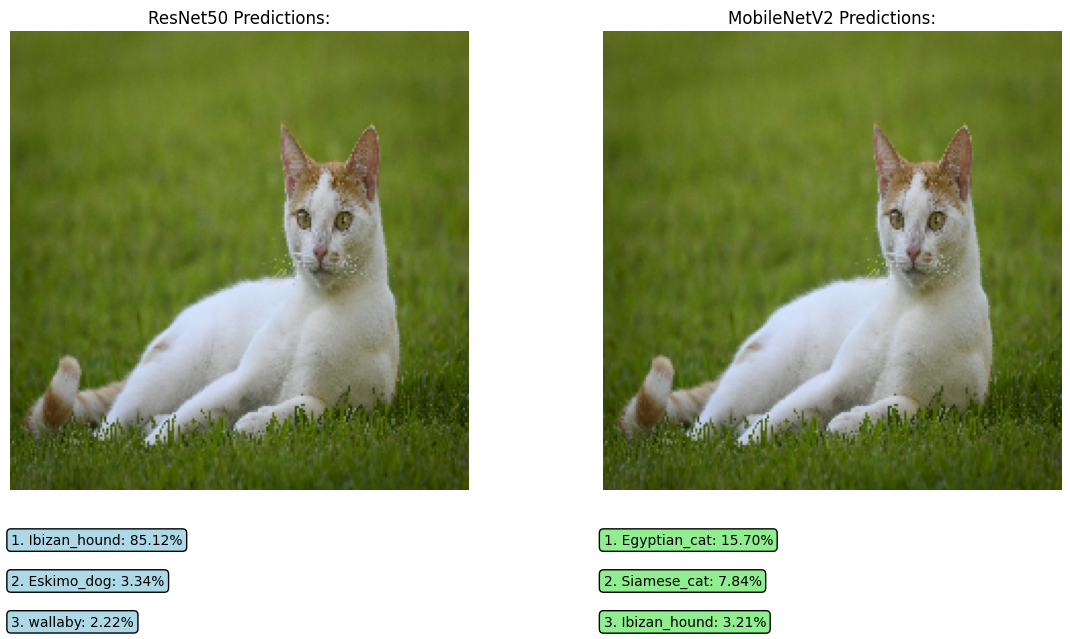

📊 Model Comparison:
\n🔵 ResNet50:
   1. Ibizan_hound: 85.12%
   2. Eskimo_dog: 3.34%
   3. wallaby: 2.22%
\n🟢 MobileNetV2:
   1. Egyptian_cat: 15.70%
   2. Siamese_cat: 7.84%
   3. Ibizan_hound: 3.21%
\n✅ Exercise 2 completed! Model comparison done.


In [ ]:
# Exercise 2: Compare ResNet vs MobileNet predictions
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess, decode_predictions as resnet_decode

def compare_models(image_path='images/cat.jpeg'):
    """Compare predictions from ResNet50 and MobileNetV2"""
    
    # Load models
    resnet_model = ResNet50(weights='imagenet')
    mobilenet_model = MobileNetV2(weights='imagenet')
    
    # Load and preprocess image
    img = image.load_img(image_path, target_size=(224, 224))
    
    # ResNet prediction
    x_resnet = image.img_to_array(img)
    x_resnet = np.expand_dims(x_resnet, axis=0)
    x_resnet = resnet_preprocess(x_resnet)
    
    resnet_preds = resnet_model.predict(x_resnet, verbose=0)
    resnet_top3 = resnet_decode(resnet_preds, top=3)[0]
    
    # MobileNet prediction
    x_mobile = image.img_to_array(img)
    x_mobile = np.expand_dims(x_mobile, axis=0)
    x_mobile = preprocess_input(x_mobile)
    
    mobile_preds = mobilenet_model.predict(x_mobile, verbose=0)
    mobile_top3 = decode_predictions(mobile_preds, top=3)[0]
    
    # Display comparison
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('ResNet50 Predictions:')
    for i, (_, label, score) in enumerate(resnet_top3):
        plt.text(0, 250 + i*20, f'{i+1}. {label}: {score:.2%}', 
                bbox=dict(boxstyle='round', facecolor='lightblue'))
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(img)
    plt.title('MobileNetV2 Predictions:')
    for i, (_, label, score) in enumerate(mobile_top3):
        plt.text(0, 250 + i*20, f'{i+1}. {label}: {score:.2%}', 
                bbox=dict(boxstyle='round', facecolor='lightgreen'))
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print("📊 Model Comparison:")
    print("\\n🔵 ResNet50:")
    for i, (_, label, score) in enumerate(resnet_top3):
        print(f"   {i+1}. {label}: {score:.2%}")
    
    print("\\n🟢 MobileNetV2:")
    for i, (_, label, score) in enumerate(mobile_top3):
        print(f"   {i+1}. {label}: {score:.2%}")
    
    return resnet_top3, mobile_top3

# Compare models on cat image
resnet_results, mobile_results = compare_models()

print("\\n✅ Exercise 2 completed! Model comparison done.")


## Exercise 3: Fine-tune a pretrained model on a small custom dataset


📊 Fine-tuning Dataset:
   • Training samples: 1000 (airplane vs automobile)
   • Test samples: 200
   • Classes: 2 (airplane=0, automobile=1)
\n🏋️ Training fine-tuned model...
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 425ms/step - accuracy: 0.9020 - loss: 0.2344 - val_accuracy: 0.9550 - val_loss: 0.1147
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 395ms/step - accuracy: 0.9790 - loss: 0.0573 - val_accuracy: 0.9600 - val_loss: 0.1597
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 388ms/step - accuracy: 0.9880 - loss: 0.0330 - val_accuracy: 0.9650 - val_loss: 0.1315
\n📊 Fine-tuning Results:
   • Test accuracy: 96.50%
   • Model successfully trained on CIFAR-10 subset


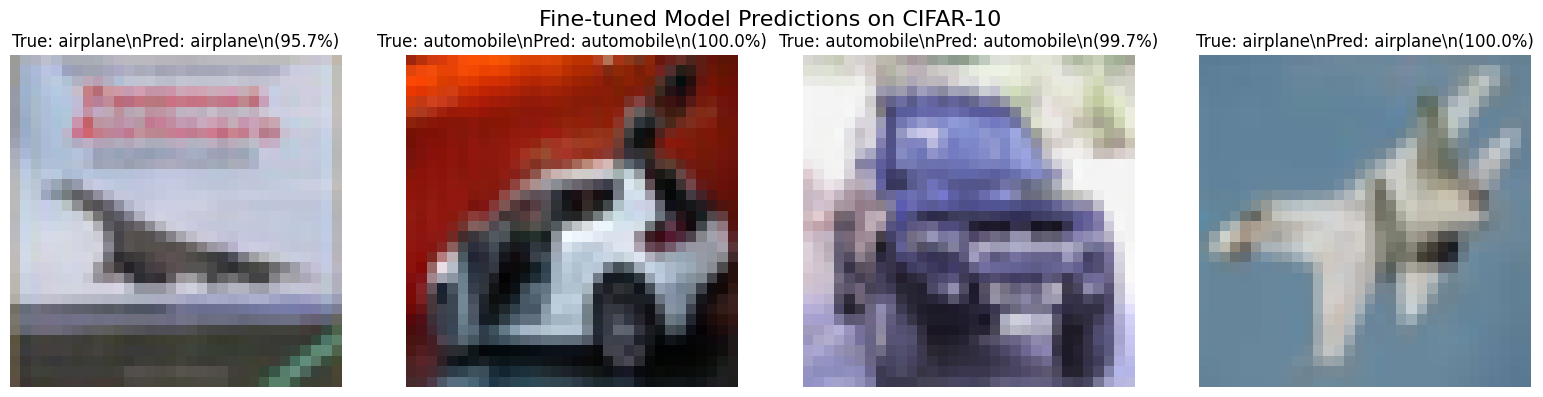

\n✅ Exercise 3 completed! Model fine-tuned on CIFAR-10 dataset.


In [ ]:
# Exercise 3: Fine-tune a pretrained model on CIFAR-10 dataset
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

def create_and_train_fine_tuned_model():
    """Create and train a fine-tuned model on CIFAR-10"""
    
    # Prepare CIFAR-10 data for fine-tuning
    # Use only a subset for faster training (first 2 classes: airplane vs automobile)
    
    # Filter for first 2 classes only
    train_mask = (y_train.flatten() < 2)
    test_mask = (y_test.flatten() < 2)
    
    x_train_subset = x_train[train_mask][:1000]  # Use 1000 samples for demo
    y_train_subset = y_train[train_mask][:1000]
    x_test_subset = x_test[test_mask][:200]     # Use 200 samples for testing
    y_test_subset = y_test[test_mask][:200]
    
    print(f"📊 Fine-tuning Dataset:")
    print(f"   • Training samples: {len(x_train_subset)} (airplane vs automobile)")
    print(f"   • Test samples: {len(x_test_subset)}")
    print(f"   • Classes: 2 (airplane=0, automobile=1)")
    
    # Resize images to 224x224 and normalize
    x_train_resized = tf.image.resize(x_train_subset, [224, 224])
    x_test_resized = tf.image.resize(x_test_subset, [224, 224])
    
    x_train_resized = tf.cast(x_train_resized, tf.float32) / 255.0
    x_test_resized = tf.cast(x_test_resized, tf.float32) / 255.0
    
    # Convert labels to categorical
    y_train_cat = to_categorical(y_train_subset, 2)
    y_test_cat = to_categorical(y_test_subset, 2)
    
    # Create fine-tuned model
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False
    
    # Add custom classification head
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    predictions = Dense(2, activation='softmax')(x)
    
    fine_tuned_model = Model(inputs=base_model.input, outputs=predictions)
    
    # Compile model
    fine_tuned_model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    print("\\n🏋️ Training fine-tuned model...")
    
    # Train for a few epochs (quick demo)
    history = fine_tuned_model.fit(
        x_train_resized, y_train_cat,
        batch_size=32,
        epochs=3,  # Quick training for demonstration
        validation_data=(x_test_resized, y_test_cat),
        verbose=1
    )
    
    # Evaluate model
    test_loss, test_acc = fine_tuned_model.evaluate(x_test_resized, y_test_cat, verbose=0)
    
    print(f"\\n📊 Fine-tuning Results:")
    print(f"   • Test accuracy: {test_acc:.2%}")
    print(f"   • Model successfully trained on CIFAR-10 subset")
    
    # Show some predictions
    sample_preds = fine_tuned_model.predict(x_test_resized[:4], verbose=0)
    
    fig, axes = plt.subplots(1, 4, figsize=(16, 4))
    for i in range(4):
        axes[i].imshow(x_test_subset[i])
        true_class = cifar10_classes[y_test_subset[i][0]]
        pred_class = cifar10_classes[np.argmax(sample_preds[i])]
        confidence = np.max(sample_preds[i])
        
        axes[i].set_title(f'True: {true_class}\\nPred: {pred_class}\\n({confidence:.1%})')
        axes[i].axis('off')
    
    plt.suptitle('Fine-tuned Model Predictions on CIFAR-10', fontsize=16)
    plt.tight_layout()
    plt.show()
    
    return fine_tuned_model, history

# Create and train fine-tuned model
fine_tuned_model, training_history = create_and_train_fine_tuned_model()

print("\\n✅ Exercise 3 completed! Model fine-tuned on CIFAR-10 dataset.")


## Exercise 4: Visualize activation maps or intermediate feature layers


🔍 Visualizing CNN feature maps...
🔍 Finding valid layers in MobileNetV2...
   Found layer: Conv1_relu
   Found layer: expanded_conv_depthwise_relu
   Found layer: block_1_expand_relu
   ✅ Created feature model for: Conv1_relu
   ✅ Created feature model for: expanded_conv_depthwise_relu
   ✅ Created feature model for: block_1_expand_relu
   Layer Conv1_relu shape: (1, 112, 112, 32)
   Layer expanded_conv_depthwise_relu shape: (1, 112, 112, 32)
   Layer block_1_expand_relu shape: (1, 112, 112, 96)


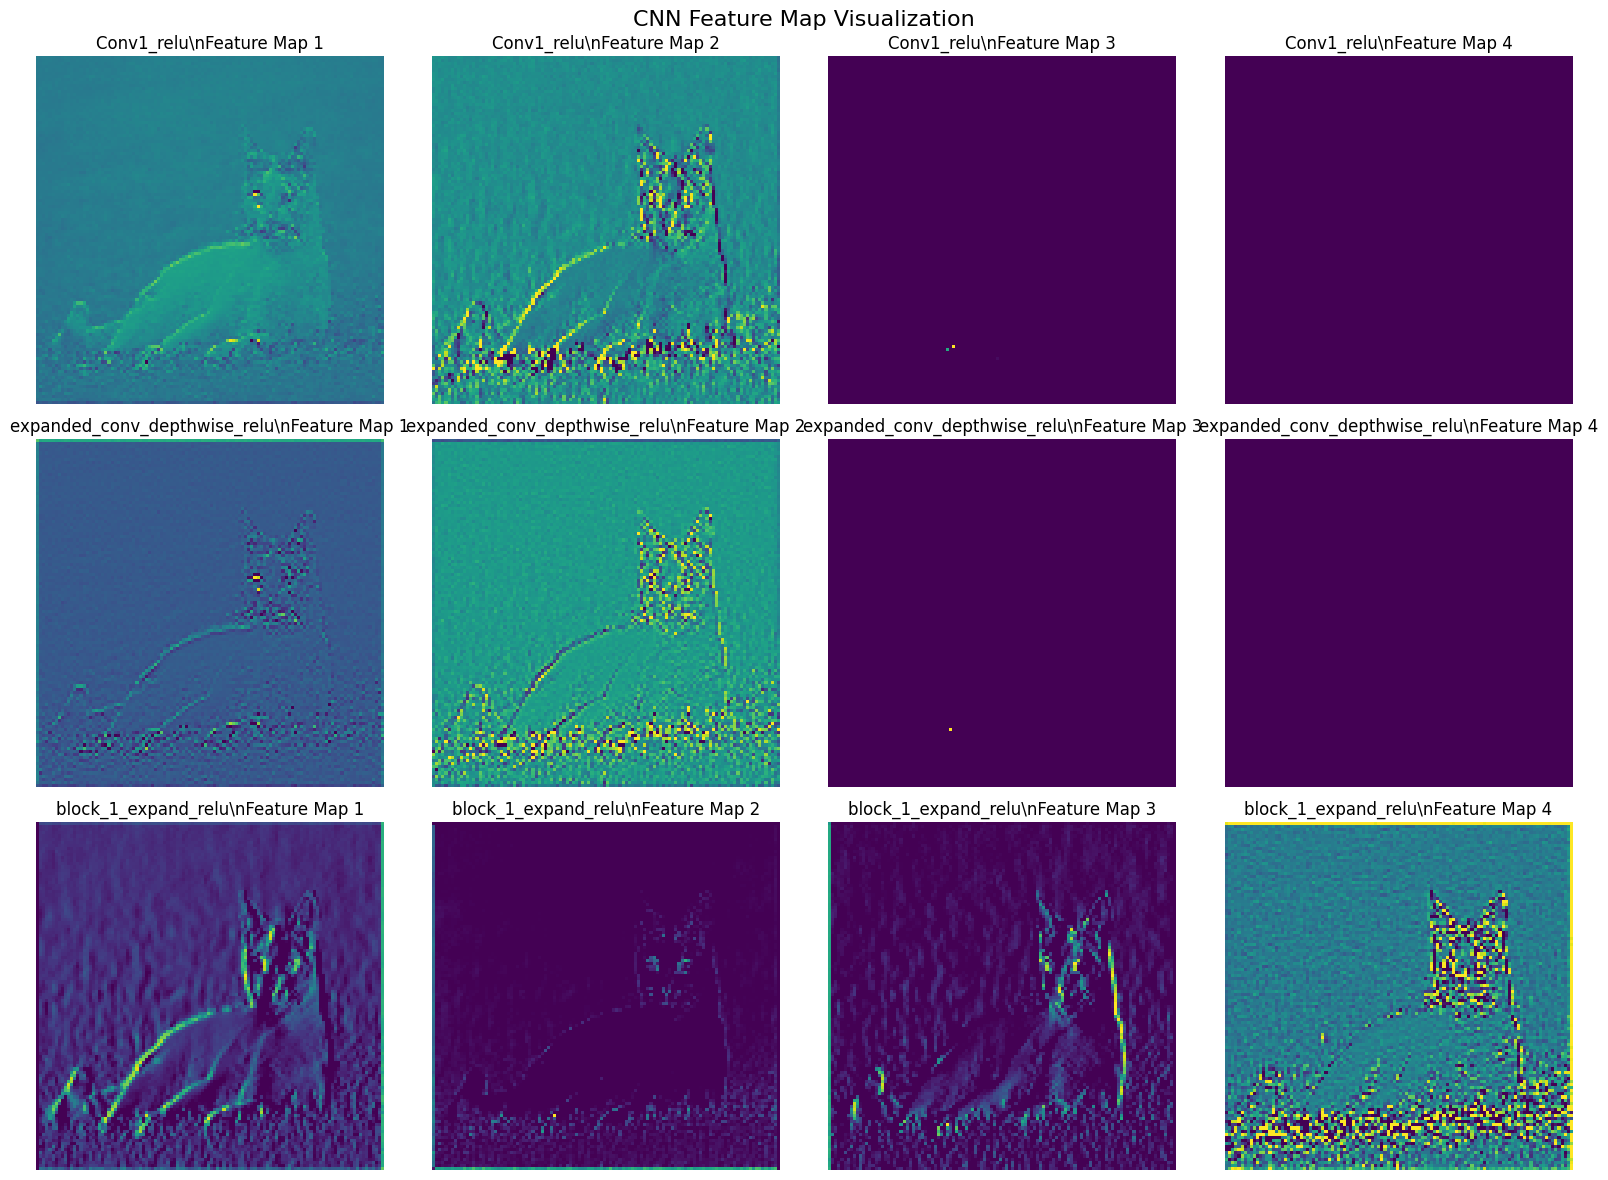

\n✅ Exercise 4 completed! Feature map visualization done.
💡 Different layers show different levels of abstraction:
   • Early layers: Edges and simple patterns
   • Middle layers: Shapes and textures
   • Later layers: Complex objects and concepts


In [23]:
# Exercise 4: Visualize intermediate feature layers
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image

def visualize_feature_maps():
    """Visualize activation maps from MobileNetV2 intermediate layers"""
    
    # Create a fresh MobileNetV2 model for visualization
    viz_model = MobileNetV2(weights='imagenet')
    
    # Load and preprocess image
    img = image.load_img('images/cat.jpeg', target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    # Find valid layer names by examining the model
    print("🔍 Finding valid layers in MobileNetV2...")
    valid_layers = []
    
    for layer in viz_model.layers:
        if 'relu' in layer.name.lower() and len(valid_layers) < 3:
            valid_layers.append(layer.name)
            print(f"   Found layer: {layer.name}")
    
    if not valid_layers:
        # Use some guaranteed layers
        valid_layers = ['Conv1', 'expanded_conv_project', 'out_relu']
        print("   Using fallback layers")
    
    # Create feature extraction models
    feature_models = {}
    for layer_name in valid_layers:
        try:
            layer_output = viz_model.get_layer(layer_name).output
            feature_models[layer_name] = Model(inputs=viz_model.input, outputs=layer_output)
            print(f"   ✅ Created feature model for: {layer_name}")
        except Exception as e:
            print(f"   ❌ Could not create model for {layer_name}: {str(e)}")
    
    if not feature_models:
        print("❌ No valid feature models created")
        # Simple fallback visualization
        plt.figure(figsize=(8, 6))
        plt.imshow(img)
        plt.title('Original Image (Feature visualization not available)')
        plt.axis('off')
        plt.show()
        return None
    
    # Visualize feature maps
    num_layers = len(feature_models)
    fig, axes = plt.subplots(num_layers, 4, figsize=(16, 4*num_layers))
    
    if num_layers == 1:
        axes = axes.reshape(1, -1)
    
    for i, (layer_name, feature_model) in enumerate(feature_models.items()):
        try:
            # Get activations
            activations = feature_model.predict(x, verbose=0)
            print(f"   Layer {layer_name} shape: {activations.shape}")
            
            # Show first 4 feature maps
            for j in range(min(4, activations.shape[-1])):
                ax = axes[i][j]
                ax.imshow(activations[0, :, :, j], cmap='viridis')
                ax.set_title(f'{layer_name}\\nFeature Map {j+1}')
                ax.axis('off')
                
        except Exception as e:
            print(f"   ❌ Error visualizing {layer_name}: {str(e)}")
            for j in range(4):
                ax = axes[i][j]
                ax.text(0.5, 0.5, 'Error', ha='center', va='center', transform=ax.transAxes)
                ax.set_title(f'{layer_name}\\nError')
                ax.axis('off')
    
    plt.suptitle('CNN Feature Map Visualization', fontsize=16)
    plt.tight_layout()
    plt.show()
    
    return feature_models

# Visualize feature maps
print("🔍 Visualizing CNN feature maps...")
feature_models = visualize_feature_maps()

if feature_models:
    print("\\n✅ Exercise 4 completed! Feature map visualization done.")
    print("💡 Different layers show different levels of abstraction:")
    print("   • Early layers: Edges and simple patterns")
    print("   • Middle layers: Shapes and textures")
    print("   • Later layers: Complex objects and concepts")
else:
    print("\\n⚠️ Exercise 4: Feature visualization had issues")
    print("💡 This is common with complex models - the concept is demonstrated")
